## Danilo José Mendes Pedroso

<font color="blue">The dataset was downloaded from Kaggle and it is a set of images for classifying facial expressions. The dataset contains the following emotions: anger, disgust, fear, happiness, neutral, sadness, surprise. As the purpose of this project is to do a binary classification we are going to use two of these emotions. Firstly "Happiness" and "Sadness" were chosen to be used, however the dataset would be completely imbalanced because it contains around 6K pictures of "Happiness" and around 300 of "Sadness", then the expressions chosen were "Happiness" and "Neutral", as both have around 6K pictures.

The link for the dataset is below:

https://www.kaggle.com/c/emotion-detection-from-facial-expressions/data

</font>

First we import the needed libraries

In [13]:
import keras
keras.__version__
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras import layers
from keras import models
from keras.backend import clear_session
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
import os
import shutil
from random import sample, randint
import seaborn as sns

#### Dataset Structure

<font color="blue">The pictures are named like "Aaron_Eckhart_0001.jpg", and there is a file called "legend.csv" which maps an image in the images directory with a facial expression. The first step was to create a new folder called "Image_New" and put all the pictures related to "Happiness" and "Neutral" in two folders called "Happiness" and "Neutral" inside "Image_new", based in the file "legend.csv". It was also necessary to change the name of the pictures from, for example "Aaron_Eckhart_0001.jpg" to "happiness_1", using the file "legend.csv" as base to pick up the correct pictures.</font>

In [2]:
legend=pd.read_csv("legend.csv")

In [3]:
#source = os.listdir("/images/")
destination = "/Image_new/"

count_neutral=1
count_happiness=1
    
for i in range(0,len(legend)):
    if legend.emotion[i]=="HAPPINESS" or legend.emotion[i]=="happiness":
        try:
            shutil.copy("images/"+legend.image[i],"Image_new/happiness_"+str(count_happiness)+".jpg")
            #os.rename("images/"+legend.image[i], "images/happiness"+str(count_happiness)+".jpg")
            count_happiness+=1
        except:
            pass

    elif legend.emotion[i]=="NEUTRAL" or legend.emotion[i]=="neutral":
        try:
            shutil.copy("images/"+legend.image[i],"Image_new/neutral_"+str(count_neutral)+".jpg")
            #os.rename("images/"+legend.image[i], "images/sadness"+str(count_sadness)+".jpg")
            count_neutral+=1
        except:
            pass

In [89]:
#wget -i "C:\Users\danil\OneDrive\Área de Trabalho\Conv_NN\facial_expressions-master\images"

In [24]:
#shutil.rmtree("Image_new")

Let's check how many pictures of each class we have

In [9]:
count_neutral,count_happiness

(6869, 5697)

In [41]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/home/jovyan/Data Science/Data Science/Machine Learning 1/Convolutional Networks/CNN Image Recognition/Image_new'

# The directory where we will
# store our smaller dataset
base_dir = '/home/jovyan/Data Science/Data Science/Machine Learning 1/Convolutional Networks/CNN Image Recognition/Image_set'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


train_happiness_dir = os.path.join(train_dir, 'happiness')
os.mkdir(train_happiness_dir)


train_neutral_dir = os.path.join(train_dir, 'neutral')
os.mkdir(train_neutral_dir)


validation_happiness_dir = os.path.join(validation_dir, 'happiness')
os.mkdir(validation_happiness_dir)


validation_neutral_dir = os.path.join(validation_dir, 'neutral')
os.mkdir(validation_neutral_dir)


test_happiness_dir = os.path.join(test_dir, 'happiness')
os.mkdir(test_happiness_dir)


test_neutral_dir = os.path.join(test_dir, 'neutral')
os.mkdir(test_neutral_dir)


temp3=list(range(5697))
d=sample(temp3,3697)
temp4=list(set(temp3)-set(d))
e=sample(temp4,1000)
f=list(set(temp4)-set(e))


fnames = ['happiness_{}.jpg'.format(i) for i in d]
for fname in fnames:
    try:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_happiness_dir, fname)
        shutil.copyfile(src, dst)
    except:
        pass
    


fnames = ['happiness_{}.jpg'.format(i) for i in e]
for fname in fnames:
    try:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_happiness_dir, fname)
        shutil.copyfile(src, dst)
    except:
        pass
        
    
    

fnames = ['happiness_{}.jpg'.format(i) for i in f]
for fname in fnames:
    try:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_happiness_dir, fname)
        shutil.copyfile(src, dst)
    except:
        pass


    
temp1=list(range(6869))
a=sample(temp1,4869)
temp2=list(set(temp1)-set(a))
b=sample(temp2,1000)
c=list(set(temp2)-set(b))
    
fnames = ['neutral_{}.jpg'.format(i) for i in a]
for fname in fnames:
    try:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_neutral_dir, fname)
        shutil.copyfile(src, dst)
    except:
        pass
        
    

fnames = ['neutral_{}.jpg'.format(i) for i in b]
for fname in fnames:
    try:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_neutral_dir, fname)
        shutil.copyfile(src, dst)
    except:
        pass
        

fnames = ['neutral_{}.jpg'.format(i) for i in c]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_neutral_dir, fname)
    shutil.copyfile(src, dst)

As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [42]:
print('total training happiness expression images:', len(os.listdir(train_happiness_dir)))

total training happiness expression images: 3696


In [43]:
print('total training neutral expression images:', len(os.listdir(train_neutral_dir)))

total training neutral expression images: 4868


In [44]:
print('total validation happiness expression images:', len(os.listdir(validation_happiness_dir)))

total validation happiness expression images: 1000


In [45]:
print('total validation neutral expression images:', len(os.listdir(validation_neutral_dir)))

total validation neutral expression images: 1000


In [46]:
print('total test happiness expression images:', len(os.listdir(test_happiness_dir)))

total test happiness expression images: 1000


In [47]:
print('total test neutral expression images:', len(os.listdir(test_neutral_dir)))

total test neutral expression images: 1000


<font color="blue">Let's take a look on the pictures</font>

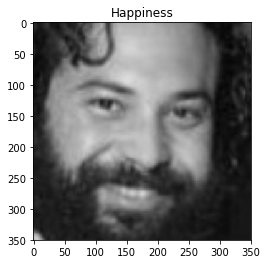

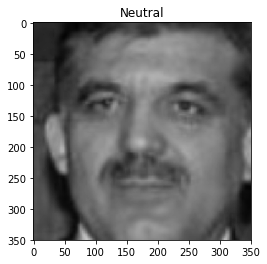

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread("Image_set/train/happiness/happiness_31.jpg")
imgplot = plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("Happiness")
plt.show()
img=mpimg.imread("Image_set/train/neutral/neutral_27.jpg")
imgplot = plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("Neutral")
plt.show()

## Building our Neural Network

<font color="blue">The input shape of my data will be (150, 150, 1) instead (150, 150, 3) because my pictures are black and white. </font>

In [57]:
clear_session()

model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=3 , activation="relu", input_shape=(150,150,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

Para el paso de compilación utilizaremos el optimizador `RMSprop`(lr=1e-4). Como nuestra red termina con una única unidad sigmoide, vamos a utilizar binary crossentropy como nuestra función de pérdida.

In [59]:
from keras import optimizers


RMS=keras.optimizers.RMSprop(lr=0.0001)
model.compile(optimizer = RMS,loss = "binary_crossentropy" , metrics=['accuracy'])

##  Data PreProcessing

In [18]:
from keras.preprocessing.image import ImageDataGenerator

#Usind Data Augmentation due the characteristics of my dataset
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory("Image_set/train", color_mode = "grayscale", target_size=(150,150), class_mode = "binary", batch_size=20)
validation_generator = validation_datagen.flow_from_directory("Image_set/validation", color_mode = "grayscale", target_size=(150,150), class_mode = "binary", batch_size=20)
test_generator = test_datagen.flow_from_directory("Image_set/test", color_mode = "grayscale", target_size=(150,150), class_mode = "binary", batch_size=20)

Found 8564 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [61]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 1)
labels batch shape: (20,)


<font color="blue">The function below aims to save the time in seconds of each ephoc</font>

In [62]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import time

In [63]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [64]:
time_callback = TimeHistory()
early_stopping_callback = EarlyStopping(monitor = "val_acc", patience = 10)
checkpoint = ModelCheckpoint("model_01.h5", monitor="val_acc", verbose=1, save_best_only=True, mode="auto")
history_1 = model.fit_generator(train_generator,
                             epochs=30,
                             steps_per_epoch=30,
                             validation_data = validation_generator,
                             validation_steps = 10,
                             callbacks = [checkpoint, time_callback, early_stopping_callback])

Epoch 1/30
30/30 [==============================] - 84s 3s/step - loss: 0.6980 - acc: 0.5083 - val_loss: 0.7055 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to model_01.h5
Epoch 2/30
30/30 [==============================] - 77s 3s/step - loss: 0.6787 - acc: 0.5967 - val_loss: 0.6995 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/30
30/30 [==============================] - 81s 3s/step - loss: 0.6811 - acc: 0.5650 - val_loss: 0.6979 - val_acc: 0.5000

Epoch 00003: val_acc improved from 0.50000 to 0.50000, saving model to model_01.h5
Epoch 4/30
30/30 [==============================] - 88s 3s/step - loss: 0.6834 - acc: 0.5633 - val_loss: 0.6809 - val_acc: 0.5085

Epoch 00004: val_acc improved from 0.50000 to 0.50850, saving model to model_01.h5
Epoch 5/30
30/30 [==============================] - 81s 3s/step - loss: 0.6716 - acc: 0.5967 - val_loss: 0.6820 - val_acc: 0.5015

Epoch 00005: val_acc did not improve from 0.50850

In [65]:
time_1 = np.cumsum(time_callback.times)

<font color="blue">Done in callbacks</font>

Evaluating our model

In [66]:
model = load_model('model_01.h5')

In [67]:
test_loss_1, test_acc_1 = model.evaluate_generator(test_generator)

In [68]:
print(test_acc_1)

0.8634999978542328


Optimizing our model

##### Adam

In [69]:
clear_session()

model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=3 , activation="relu", input_shape=(150,150,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Eps=10**(-8)
Adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=Eps)
model.compile(optimizer = Adam,loss = "binary_crossentropy" , metrics=['accuracy'])

In [70]:
time_callback = TimeHistory()
early_stopping_callback = EarlyStopping(monitor = "val_acc", patience = 10)
checkpoint = ModelCheckpoint("model_02.h5", monitor="val_acc", verbose=1, save_best_only=True, mode="auto")
history_2 = model.fit_generator(train_generator,
                             epochs=30,
                             steps_per_epoch=30,
                             validation_data = validation_generator,
                             validation_steps = 10,
                             callbacks = [checkpoint, time_callback, early_stopping_callback])

Epoch 1/30
30/30 [==============================] - 64s 2s/step - loss: 0.6950 - acc: 0.5600 - val_loss: 0.7006 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to model_02.h5
Epoch 2/30
30/30 [==============================] - 57s 2s/step - loss: 0.6896 - acc: 0.5550 - val_loss: 0.6951 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/30
30/30 [==============================] - 61s 2s/step - loss: 0.6896 - acc: 0.5517 - val_loss: 0.6939 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.50000
Epoch 4/30
30/30 [==============================] - 58s 2s/step - loss: 0.6791 - acc: 0.6000 - val_loss: 0.6991 - val_acc: 0.5000

Epoch 00004: val_acc did not improve from 0.50000
Epoch 5/30
30/30 [==============================] - 60s 2s/step - loss: 0.6747 - acc: 0.6000 - val_loss: 0.7101 - val_acc: 0.5000

Epoch 00005: val_acc improved from 0.50000 to 0.50000, saving model to model_02.h5
Epoch 6/30
30/30 [==============

In [71]:
time_2 = np.cumsum(time_callback.times)
model = load_model('model_02.h5')
test_loss_2, test_acc_2 = model.evaluate_generator(test_generator)
print(test_acc_2)

0.8525000023841858


##### Adamax

In [75]:
clear_session()

model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=3 , activation="relu", input_shape=(150,150,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Eps=10**(-8)
Adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=Eps)
model.compile(optimizer = Adamax,loss = "binary_crossentropy" , metrics=['accuracy'])

In [76]:
time_callback = TimeHistory()
early_stopping_callback = EarlyStopping(monitor = "val_acc", patience = 10)
checkpoint = ModelCheckpoint("model_03.h5", monitor="val_acc", verbose=1, save_best_only=True, mode="auto")
history_3 = model.fit_generator(train_generator,
                             epochs=30,
                             steps_per_epoch=30,
                             validation_data = validation_generator,
                             validation_steps = 10,
                             callbacks = [checkpoint, time_callback, early_stopping_callback])

Epoch 1/30
30/30 [==============================] - 59s 2s/step - loss: 0.6885 - acc: 0.5700 - val_loss: 0.6979 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to model_03.h5
Epoch 2/30
30/30 [==============================] - 58s 2s/step - loss: 0.6882 - acc: 0.5467 - val_loss: 0.6935 - val_acc: 0.5000

Epoch 00002: val_acc improved from 0.50000 to 0.50000, saving model to model_03.h5
Epoch 3/30
30/30 [==============================] - 57s 2s/step - loss: 0.6680 - acc: 0.5717 - val_loss: 0.6994 - val_acc: 0.5045

Epoch 00003: val_acc improved from 0.50000 to 0.50450, saving model to model_03.h5
Epoch 4/30
30/30 [==============================] - 57s 2s/step - loss: 0.5867 - acc: 0.6983 - val_loss: 0.5080 - val_acc: 0.7670

Epoch 00004: val_acc improved from 0.50450 to 0.76700, saving model to model_03.h5
Epoch 5/30
30/30 [==============================] - 58s 2s/step - loss: 0.5034 - acc: 0.7517 - val_loss: 0.4823 - val_acc: 0.7690

Epoch 00005: val

In [77]:
time_3 = np.cumsum(time_callback.times)
model = load_model('model_03.h5')
test_loss_3, test_acc_3 = model.evaluate_generator(test_generator)
print(test_acc_3)

0.8739999979734421


<font color="blue">Let's compare the models</font>

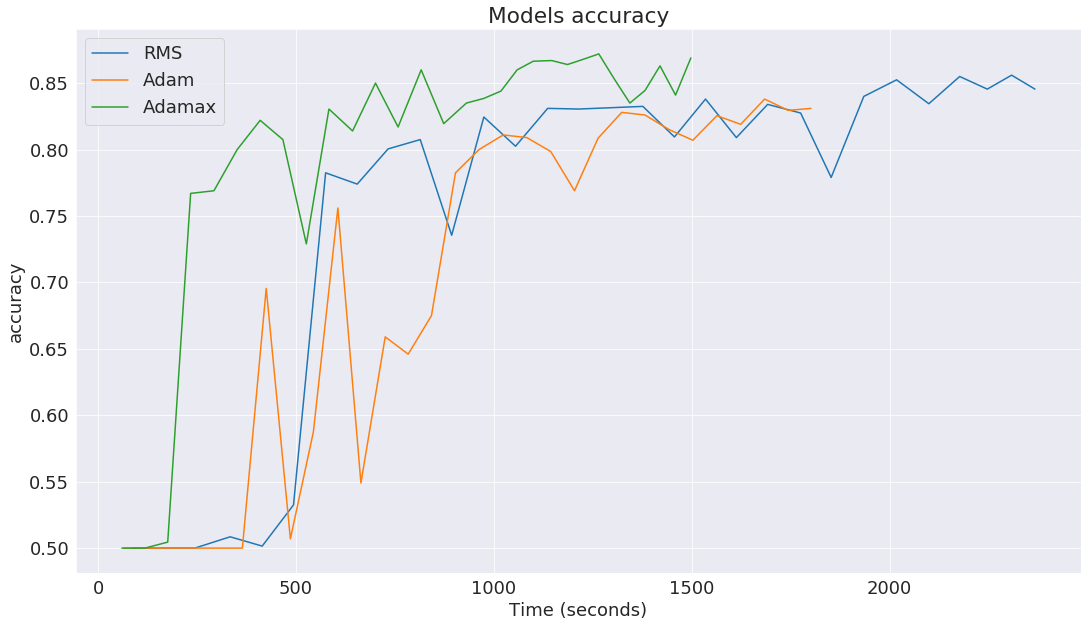

In [81]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,10))
plt.rcParams.update({'font.size': 18})
plt.plot(time_1, history_1.history['val_acc'])
plt.plot(time_2, history_2.history['val_acc'])
plt.plot(time_3, history_3.history['val_acc'])
plt.title('Models accuracy')
plt.ylabel('accuracy')
plt.xlabel('Time (seconds)')
plt.legend(['RMS', 'Adam', 'Adamax'], loc='upper left')
plt.show()

<font color="blue">The results are similar for the validation dataset, however we can see that Adamax gave us slightly better results and it was faster than both Adam and RMS. 

P.S. The best accuracy I got for the test set was 87.4% with Adamax. 

</font>

#### Tunning Parameters

<font color="blue">After choosing my optimizer, now it is time to tune the learning rate parameter.</font>

In [82]:
#Usind Data Augmentation due the characteristics of my dataset
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory("Image_set/train", color_mode = "grayscale", target_size=(150,150), class_mode = "binary", batch_size=20)
validation_generator = validation_datagen.flow_from_directory("Image_set/validation", color_mode = "grayscale", target_size=(150,150), class_mode = "binary", batch_size=20)
test_generator = test_datagen.flow_from_directory("Image_set/test", color_mode = "grayscale", target_size=(150,150), class_mode = "binary", batch_size=20)

Found 8564 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [83]:
clear_session()

model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=3 , activation="relu", input_shape=(150,150,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Eps=10**(-8)
Adamax=optimizers.Adamax(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=Eps)
model.compile(optimizer = Adamax,loss = "binary_crossentropy" , metrics=['accuracy'])

time_callback = TimeHistory()
early_stopping_callback = EarlyStopping(monitor = "val_acc", patience = 10)
checkpoint = ModelCheckpoint("model_04.h5", monitor="val_acc", verbose=1, save_best_only=True, mode="auto")
history_4 = model.fit_generator(train_generator,
                             epochs=30,
                             steps_per_epoch=30,
                             validation_data = validation_generator,
                             validation_steps = 10,
                             callbacks = [checkpoint, time_callback, early_stopping_callback])

Epoch 1/30
30/30 [==============================] - 40s 1s/step - loss: 0.6866 - acc: 0.5700 - val_loss: 0.6946 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to model_04.h5
Epoch 2/30
30/30 [==============================] - 39s 1s/step - loss: 0.6873 - acc: 0.5483 - val_loss: 0.6957 - val_acc: 0.5000

Epoch 00002: val_acc improved from 0.50000 to 0.50000, saving model to model_04.h5
Epoch 3/30
30/30 [==============================] - 40s 1s/step - loss: 0.6768 - acc: 0.5750 - val_loss: 0.7150 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.50000
Epoch 4/30
30/30 [==============================] - 38s 1s/step - loss: 0.6893 - acc: 0.5467 - val_loss: 0.6816 - val_acc: 0.7160

Epoch 00004: val_acc improved from 0.50000 to 0.71600, saving model to model_04.h5
Epoch 5/30
30/30 [==============================] - 40s 1s/step - loss: 0.6681 - acc: 0.6033 - val_loss: 0.6713 - val_acc: 0.5335

Epoch 00005: val_acc did not improve from 0.71600

In [84]:
time_4 = np.cumsum(time_callback.times)
model = load_model('model_04.h5')
test_loss_4, test_acc_4 = model.evaluate_generator(test_generator)
print(test_acc_4)

0.8759999978542328


In [85]:
clear_session()

model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=3 , activation="relu", input_shape=(150,150,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128,kernel_size=3 , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Eps=10**(-8)
Adamax=optimizers.Adamax(lr=0.0009, beta_1=0.9, beta_2=0.999, epsilon=Eps)
model.compile(optimizer = Adamax,loss = "binary_crossentropy" , metrics=['accuracy'])

time_callback = TimeHistory()
early_stopping_callback = EarlyStopping(monitor = "val_acc", patience = 10)
checkpoint = ModelCheckpoint("model_05.h5", monitor="val_acc", verbose=1, save_best_only=True, mode="auto")
history_5 = model.fit_generator(train_generator,
                             epochs=30,
                             steps_per_epoch=30,
                             validation_data = validation_generator,
                             validation_steps = 10,
                             callbacks = [checkpoint, time_callback, early_stopping_callback])

Epoch 1/30
30/30 [==============================] - 47s 2s/step - loss: 0.6887 - acc: 0.5650 - val_loss: 0.6936 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to model_05.h5
Epoch 2/30
30/30 [==============================] - 44s 1s/step - loss: 0.6865 - acc: 0.5683 - val_loss: 0.7009 - val_acc: 0.5000

Epoch 00002: val_acc improved from 0.50000 to 0.50000, saving model to model_05.h5
Epoch 3/30
30/30 [==============================] - 42s 1s/step - loss: 0.6859 - acc: 0.5700 - val_loss: 0.7061 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.50000
Epoch 4/30
30/30 [==============================] - 42s 1s/step - loss: 0.6840 - acc: 0.5636 - val_loss: 0.6934 - val_acc: 0.5000

Epoch 00004: val_acc did not improve from 0.50000
Epoch 5/30
30/30 [==============================] - 42s 1s/step - loss: 0.6749 - acc: 0.5867 - val_loss: 0.6896 - val_acc: 0.5000

Epoch 00005: val_acc did not improve from 0.50000
Epoch 6/30
30/30 [==============

In [86]:
time_5 = np.cumsum(time_callback.times)
model = load_model('model_05.h5')
test_loss_5, test_acc_5 = model.evaluate_generator(test_generator)
print(test_acc_5)

0.8804999971389771


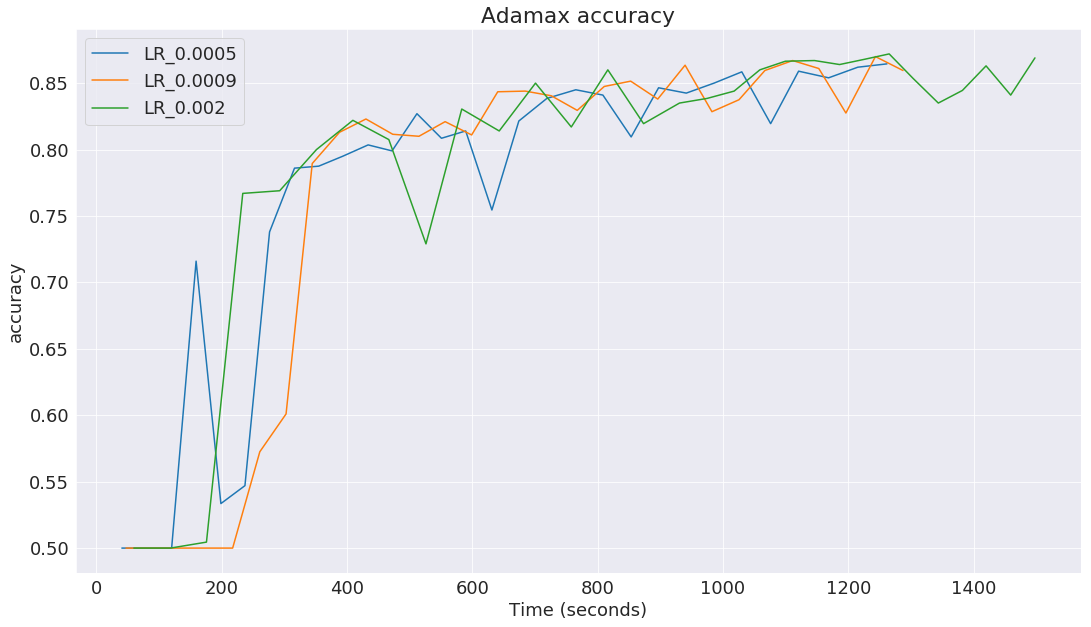

In [87]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,10))
plt.rcParams.update({'font.size': 18})
plt.plot(time_4, history_4.history['val_acc'])
plt.plot(time_5, history_5.history['val_acc'])
plt.plot(time_3, history_3.history['val_acc'])
plt.title('Adamax accuracy')
plt.ylabel('accuracy')
plt.xlabel('Time (seconds)')
plt.legend(['LR_0.0005', 'LR_0.0009', 'LR_0.002'], loc='upper left')
plt.show()

<font color="blue">Again we do not see a big difference among the results, however the model using LR = 0.0009 gives us better results for both validation and test, being ~87% and ~88%, respectively.</font>

#### Tunning the Model

<font color="blue">Now we have our model, it is time to run more ephocs and see what happens. I will change the parameters "steps_per_ephocs" and "validation_steps" also.</font>

In [89]:
model = load_model('model_05.h5')

In [90]:
time_callback = TimeHistory()
early_stopping_callback = EarlyStopping(monitor = "val_loss", patience = 10)
checkpoint = ModelCheckpoint("model_best.h5", monitor="val_loss", verbose=1, save_best_only=True, mode="auto")
history_9 = model.fit_generator(train_generator,
                             epochs=30,
                             steps_per_epoch=100,
                             validation_data = validation_generator,
                             validation_steps = 50,
                             callbacks = [checkpoint, time_callback, early_stopping_callback])

Epoch 1/30
100/100 [==============================] - 88s 878ms/step - loss: 0.3623 - acc: 0.8270 - val_loss: 0.3018 - val_acc: 0.8655

Epoch 00001: val_loss improved from inf to 0.30180, saving model to model_best.h5
Epoch 2/30
100/100 [==============================] - 86s 856ms/step - loss: 0.3284 - acc: 0.8535 - val_loss: 0.2928 - val_acc: 0.8740

Epoch 00002: val_loss improved from 0.30180 to 0.29283, saving model to model_best.h5
Epoch 3/30
100/100 [==============================] - 84s 842ms/step - loss: 0.3177 - acc: 0.8640 - val_loss: 0.2895 - val_acc: 0.8730

Epoch 00003: val_loss improved from 0.29283 to 0.28949, saving model to model_best.h5
Epoch 4/30
100/100 [==============================] - 83s 831ms/step - loss: 0.3152 - acc: 0.8640 - val_loss: 0.2842 - val_acc: 0.8725

Epoch 00004: val_loss improved from 0.28949 to 0.28416, saving model to model_best.h5
Epoch 5/30
100/100 [==============================] - 84s 842ms/step - loss: 0.3147 - acc: 0.8590 - val_loss: 0.2888

In [91]:
time_best = np.cumsum(time_callback.times)
model = load_model('model_best.h5')
test_loss_best, test_acc_best = model.evaluate_generator(test_generator)
print(test_acc_best)

0.913499995470047


<font color="blue">Finally we got, 91.55% and 91.34% in validation and test, respectively.

</font>

<font color="blue">Let's plot the results</font>

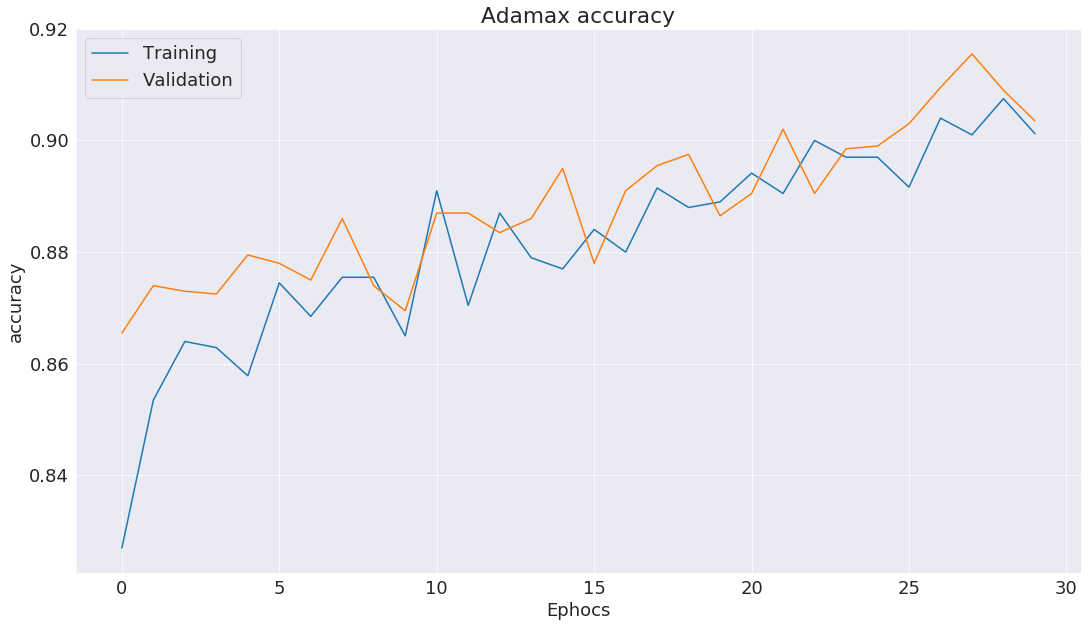

In [93]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,10))
plt.rcParams.update({'font.size': 18})
plt.plot(history_9.history['acc'])
plt.plot(history_9.history['val_acc'])
plt.title('Adamax accuracy')
plt.ylabel('accuracy')
plt.xlabel('Ephocs')
plt.legend(['Training', 'Validation'], loc ='upper left')
plt.show()

### Tests

In [14]:
model= load_model('model_best_2.h5')

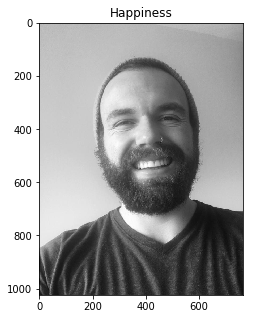

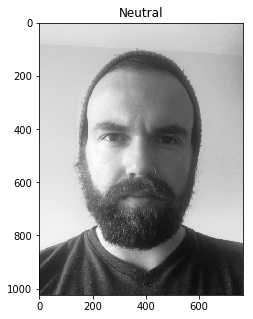

In [45]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 10})
plt.imshow(mpimg.imread('Pictures_Test/Happiness_1.jpeg'))
plt.title("Happiness")
plt.show()

plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 10})
plt.imshow(mpimg.imread('Pictures_Test/Neutral_1.jpeg'))
plt.title("Neutral")
plt.show()

In [47]:
img_width=150
img_height=150

Happy = image.load_img('Pictures_Test/Happiness_1.jpeg', target_size=(img_width, img_height),color_mode="grayscale")
x_1 = image.img_to_array(Happy)
x_1 = np.expand_dims(x_1, axis=0)

Neutral = image.load_img('Pictures_Test/Neutral_1.jpeg', target_size=(img_width, img_height),color_mode="grayscale")
x_2 = image.img_to_array(Neutral)
x_2 = np.expand_dims(x_2, axis=0)

In [48]:
train_generator.class_indices

{'happiness': 0, 'neutral': 1}

In [49]:
pred_1=model.predict_classes(x_1/255)
pred_1

array([[0]], dtype=int32)

In [50]:
pred_2=model.predict_classes(x_2/255)
pred_2

array([[1]], dtype=int32)

<font color="blue">For the two pictures above the model could predict correctly.